In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pydataset import data

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [90]:
df = pd.read_csv('bball_2019.csv')

In [91]:
df.head().transpose()

,0,1,2,3,4
Rk,1,2,3,4,5
Player,Giannis Antetokounmpo,James Harden,Anthony Davis,Nikola Jokić,Karl-Anthony Towns
salary,25842697,37800000,27093019,26573595,27250000
type,1st Round Pick,Bird Rights,1st Round Pick,0,1st round pick
Season,2018-19,2018-19,2018-19,2018-19,2018-19
Age,24,29,25,23,23
Tm,MIL,HOU,NOP,DEN,MIN
Lg,NBA,NBA,NBA,NBA,NBA
MP,32.8,36.8,33,31.3,33.1
PER,30.9,30.6,30.3,26.3,26.3


In [92]:
df = df.drop(columns=['GS','FG%','Lg','Rk','Season'])

In [93]:
df = df.drop(columns=['MP.1','eFG%'])

In [94]:
df = df.drop(columns=['Player','Tm'])

In [95]:
df = df.dropna(how='any')

In [99]:
df = df.drop(columns=['type'])

In [100]:
df.isna().sum()
df.shape
df.head(2).transpose()

,0,1
salary,2.584270e+07,3.780000e+07
Age,2.400000e+01,2.900000e+01
MP,3.280000e+01,3.680000e+01
PER,3.090000e+01,3.060000e+01
G,7.200000e+01,7.800000e+01
FG,1.100000e+01,1.060000e+01
FGA,1.900000e+01,2.400000e+01
2P,1.020000e+01,5.800000e+00
2PA,1.590000e+01,1.110000e+01
3P,8.000000e-01,4.700000e+00


   k           sse
0  1  2.481133e+16
1  2  6.055290e+15
2  3  2.356300e+15
3  4  1.453593e+15
4  5  8.744421e+14
5  6  5.493594e+14
6  7  4.181091e+14
7  8  2.967143e+14
8  9  2.253796e+14


<IPython.core.display.Javascript object>


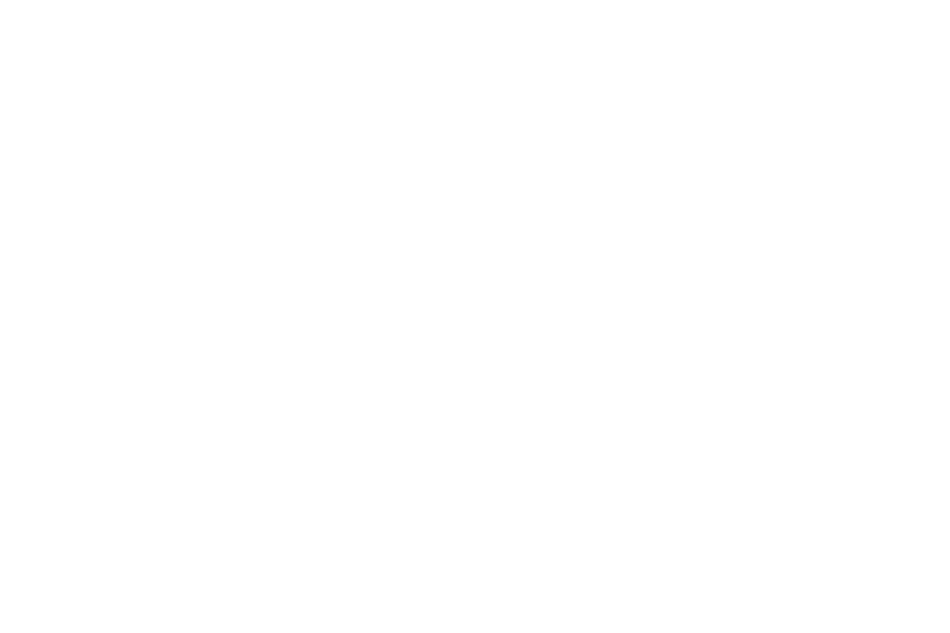

<IPython.core.display.Javascript object>


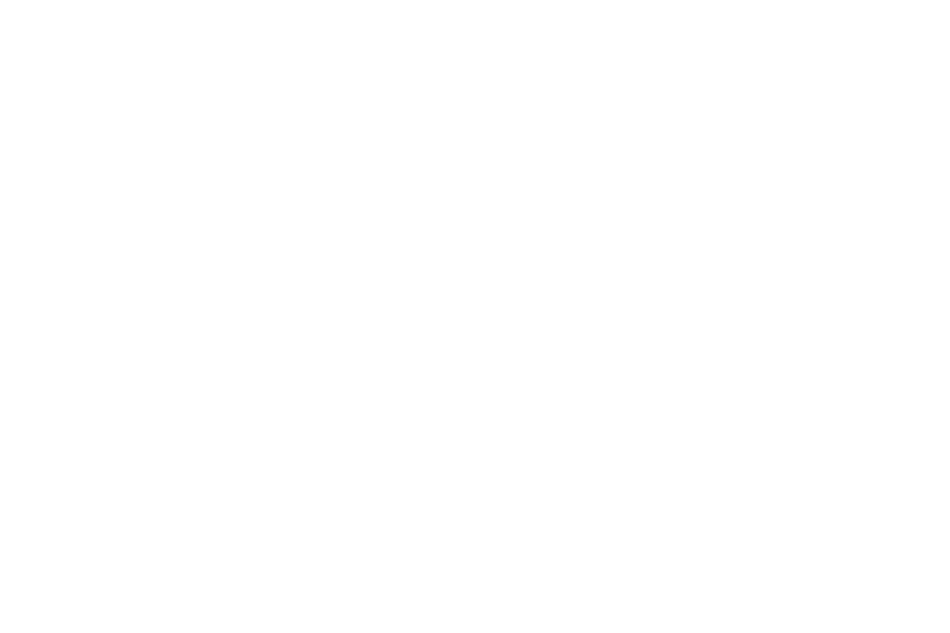

In [101]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)
    
print(pd.DataFrame(dict(k=ks,sse=sse)))

plt.plot(ks,sse,'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method for optimal k')
plt.show()

In [102]:
X = df[['TRB','AST','FT%']]

In [103]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
kmeans.predict(X)

array([2, 0, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 2, 4, 2, 1, 4, 2, 2,
       4, 4, 4, 0, 0, 0, 2, 4, 1, 1, 4, 0, 4, 4, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 4, 0, 1, 4, 2, 4, 4, 0, 4, 4, 4, 4, 4, 1, 4, 4, 0, 4,
       1, 2, 1, 4, 1, 4, 3, 4, 4, 3, 0, 3, 1, 4, 3, 0, 0, 1, 1, 0, 0, 3,
       0, 1, 3, 4, 4, 0, 1, 1, 0, 1, 4, 0, 4, 3, 0, 0, 4, 0, 1, 1, 3, 1,
       4, 0, 1, 0, 4, 1, 0, 1, 3, 1, 0, 0, 4, 1, 1, 0, 3, 0, 0, 4, 1, 0,
       0, 1, 3, 3, 1, 4, 3, 1, 3, 0, 1, 0, 1, 1, 3, 4, 1, 3, 1, 0, 1, 1,
       0, 1, 3, 1, 3, 0, 1, 1, 3, 0, 0, 1, 3, 1, 0, 1, 4, 1, 0, 1, 3, 4,
       3, 3, 3, 0, 3, 3, 3, 3, 1, 1, 3, 0, 1, 3, 3, 1, 1, 3, 3, 3, 0, 3,
       3, 3, 0, 3, 0, 0, 3, 1, 0, 4, 3, 0, 3, 3, 0, 3, 3, 3, 3, 1, 4, 0,
       3, 0, 1, 3, 1, 1, 0, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3,
       4, 3, 3, 0, 3, 1, 1, 1, 3, 1], dtype=int32)

In [104]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
kmeans.predict(X)
df['cluster'] = kmeans.predict(X)

#df.cluster = 'cluster_' + df.cluster.astype('str')



In [16]:
df.head(20)

,Age,MP,PER,G,FG,FGA,2P,2PA,3P,3PA,...,STL,BLK,TOV,PF,PTS,2P%,3P%,FT%,TS%,cluster
0,24,32.8,30.9,72,11.0,19.0,10.2,15.9,0.8,3.1,...,1.4,1.7,4.1,3.5,30.4,0.641,0.256,0.729,0.644,2
1,29,36.8,30.6,78,10.6,24.0,5.8,11.1,4.7,12.9,...,2.0,0.7,4.9,3.1,35.4,0.528,0.368,0.879,0.616,4
2,25,33.0,30.3,56,10.3,20.0,9.4,17.1,0.9,2.8,...,1.7,2.6,2.2,2.6,28.3,0.547,0.331,0.794,0.597,2
3,23,31.3,26.3,80,8.9,17.3,7.7,13.5,1.2,3.9,...,1.6,0.8,3.6,3.3,23.1,0.569,0.307,0.821,0.589,2
4,23,33.1,26.3,77,9.6,18.6,7.6,13.6,2.0,5.0,...,0.9,1.8,3.4,4.1,26.6,0.562,0.400,0.836,0.622,2
5,24,33.7,26.1,64,9.7,20.0,8.4,15.6,1.3,4.4,...,0.8,2.0,3.8,3.5,29.4,0.535,0.300,0.804,0.593,2
6,27,34.0,25.8,60,9.9,19.9,7.9,14.6,2.0,5.3,...,1.9,0.4,2.1,1.5,28.2,0.542,0.371,0.854,0.606,1
7,34,35.2,25.6,55,10.4,20.4,8.3,14.3,2.1,6.1,...,1.3,0.6,3.7,1.7,28.0,0.582,0.339,0.665,0.588,4
8,28,31.4,25.5,80,10.1,19.4,8.8,16.1,1.2,3.3,...,1.2,1.3,2.3,2.3,23.9,0.549,0.364,0.789,0.573,2
10,30,33.8,24.4,69,9.8,20.7,4.3,8.2,5.5,12.5,...,1.4,0.4,3.0,2.6,29.1,0.525,0.437,0.916,0.641,3


<IPython.core.display.Javascript object>


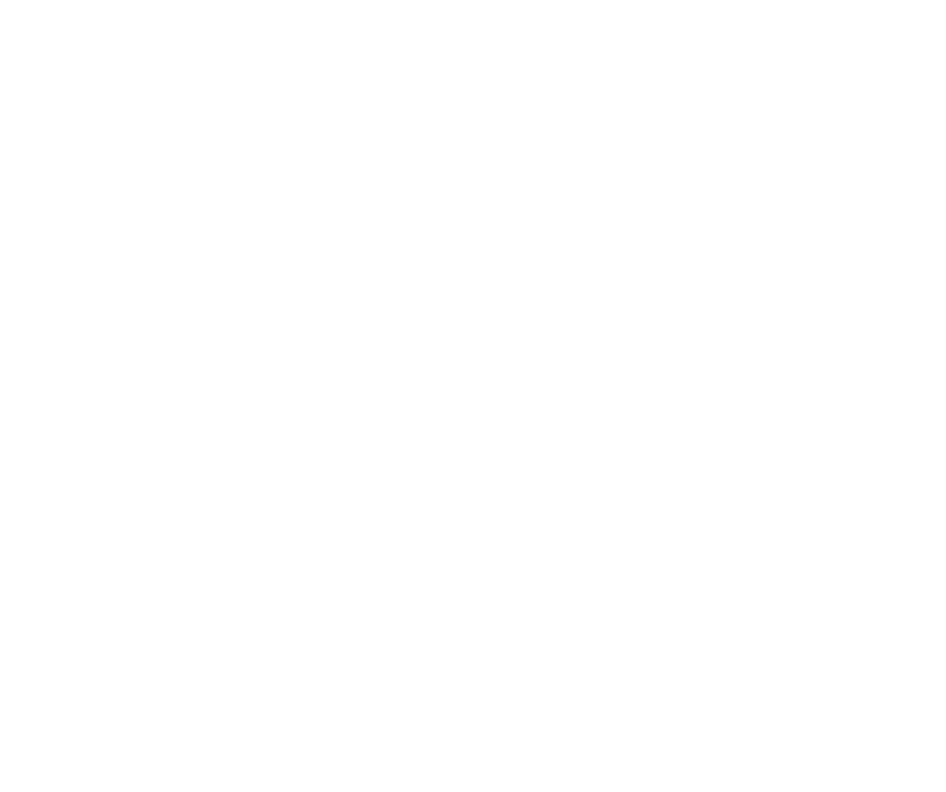

<IPython.core.display.Javascript object>


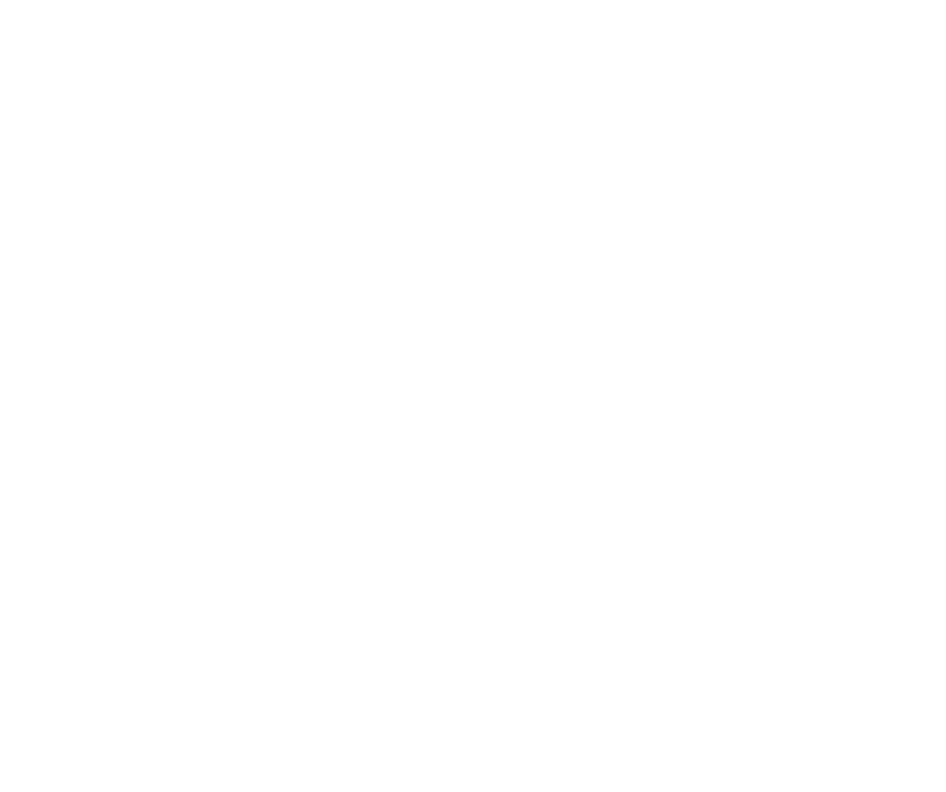

In [105]:
sns.relplot(data=df,x='TRB',y='AST',hue='cluster')

<IPython.core.display.Javascript object>


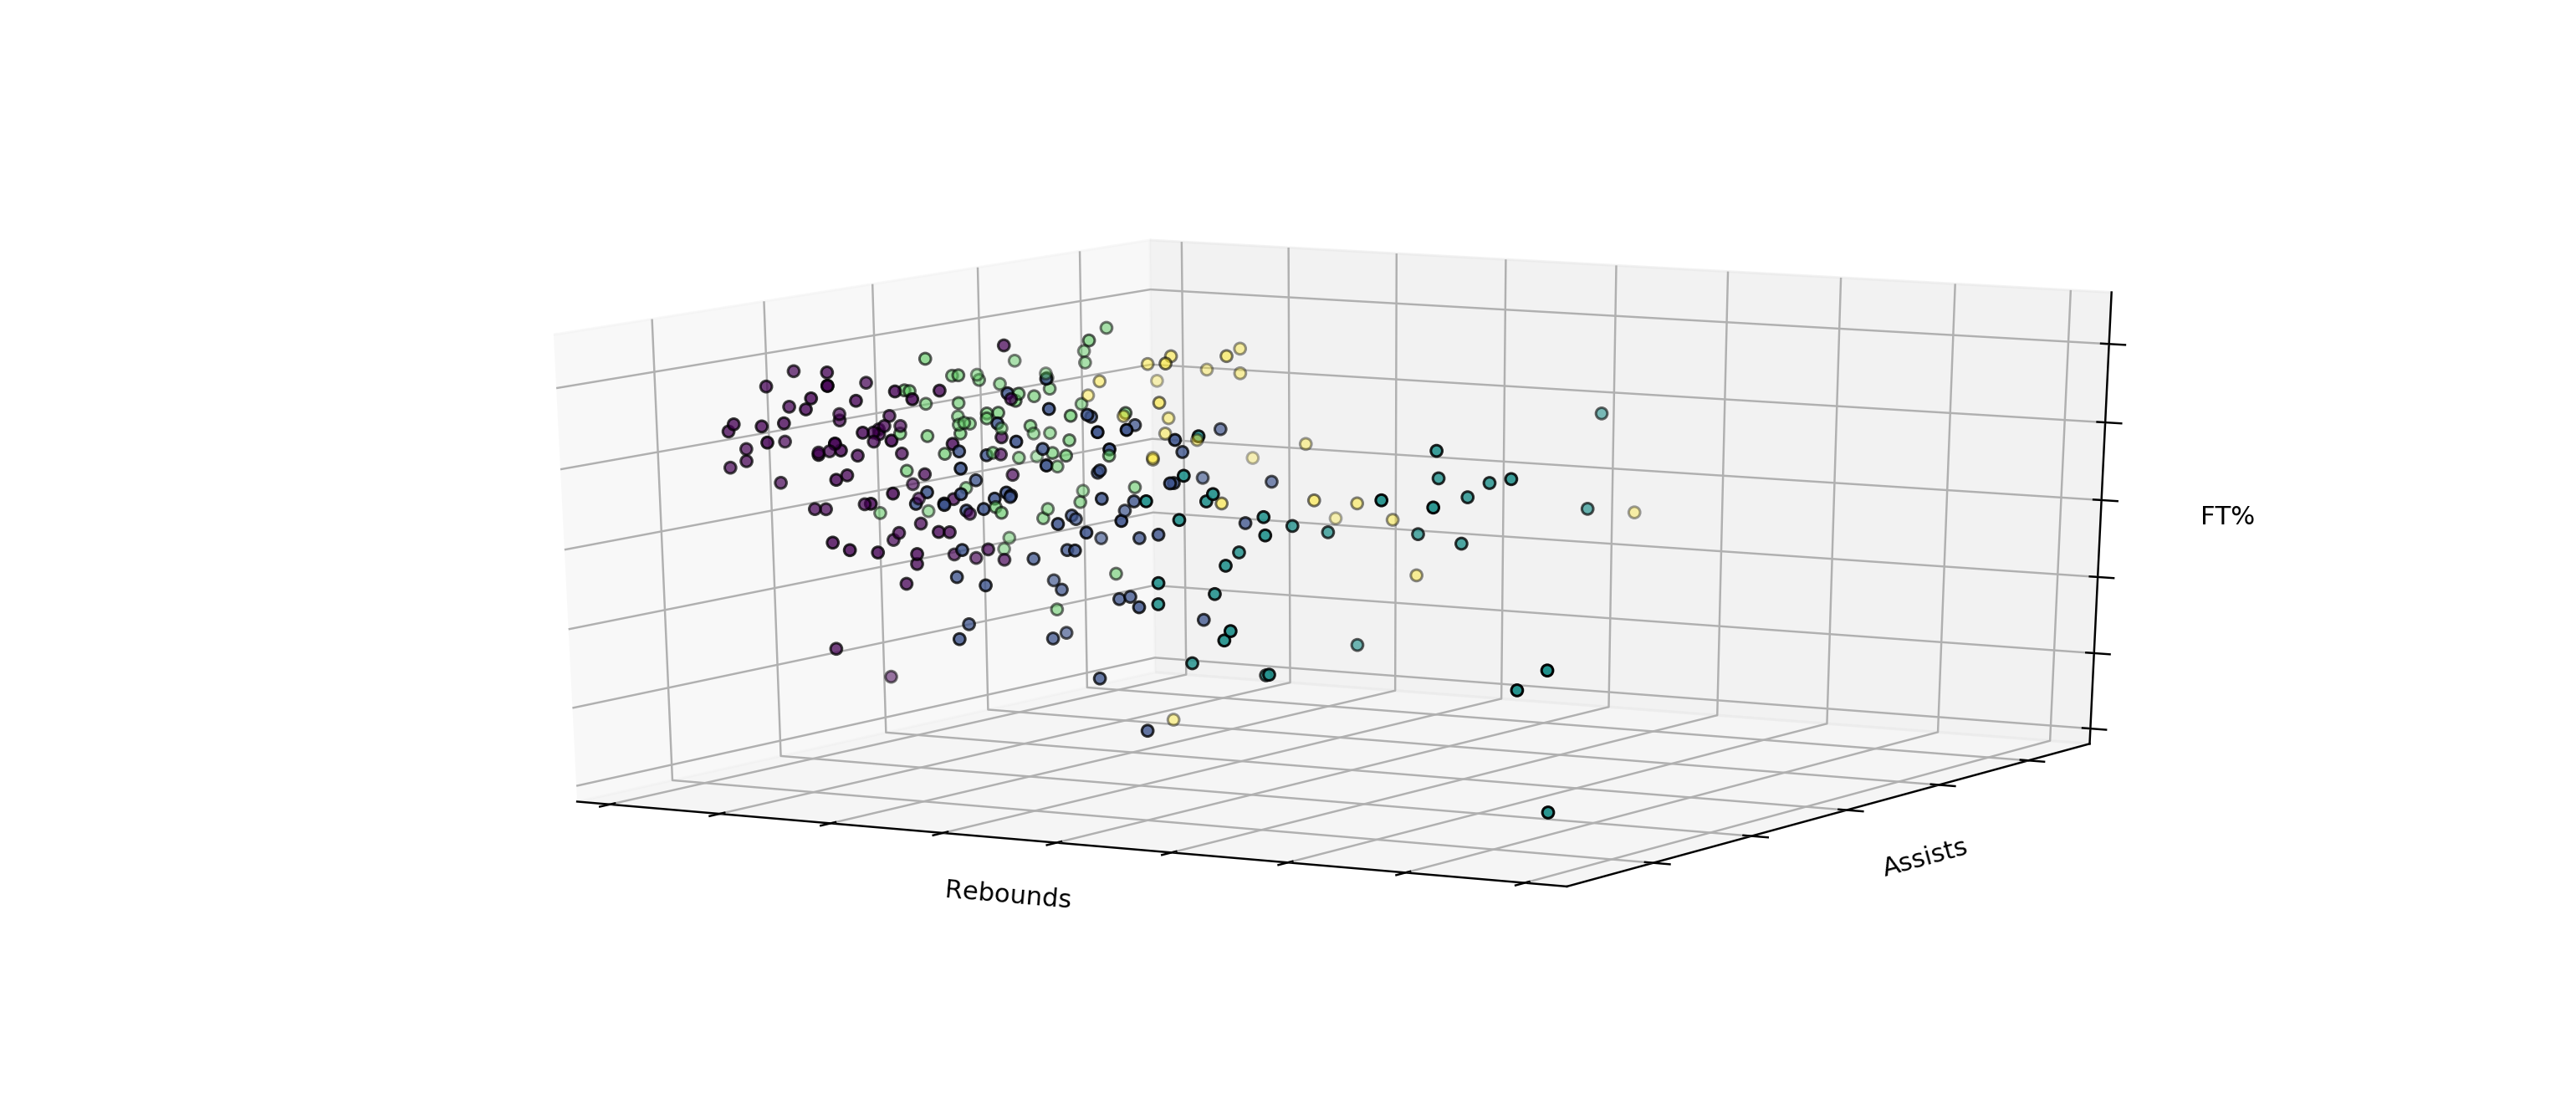

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6), subplot_kw={'projection': '3d'})
kmeans.fit(df)
#labels = kmeans.labels_
ax.scatter(df['TRB'],df['AST'],df['FT%'],c=df.cluster,edgecolor='k')
#ax.set(xticklabels=[],yticklabels=[],zticklabels=[])
ax.set(xlabel='Rebounds',ylabel='Assists',zlabel='FT%')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

In [78]:
df = pd.read_csv('bball_2019.csv')

In [79]:
df.head()

,Rk,Player,salary,type,Season,Age,Tm,Lg,MP,PER,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
0,1,Giannis Antetokounmpo,25842697,1st Round Pick,2018-19,24,MIL,NBA,32.8,30.9,...,1.7,4.1,3.5,30.4,0.578,0.641,0.256,0.599,0.729,0.644
1,2,James Harden,37800000,Bird Rights,2018-19,29,HOU,NBA,36.8,30.6,...,0.7,4.9,3.1,35.4,0.442,0.528,0.368,0.541,0.879,0.616
2,3,Anthony Davis,27093019,1st Round Pick,2018-19,25,NOP,NBA,33.0,30.3,...,2.6,2.2,2.6,28.3,0.517,0.547,0.331,0.540,0.794,0.597
3,4,Nikola Jokić,26573595,0,2018-19,23,DEN,NBA,31.3,26.3,...,0.8,3.6,3.3,23.1,0.511,0.569,0.307,0.545,0.821,0.589
4,5,Karl-Anthony Towns,27250000,1st round pick,2018-19,23,MIN,NBA,33.1,26.3,...,1.8,3.4,4.1,26.6,0.518,0.562,0.400,0.572,0.836,0.622


In [80]:
df_salaries = df[['Player','salary','PER']]

In [81]:
df_salaries

,Player,salary,PER
0,Giannis Antetokounmpo,25842697,30.9
1,James Harden,37800000,30.6
2,Anthony Davis,27093019,30.3
3,Nikola Jokić,26573595,26.3
4,Karl-Anthony Towns,27250000,26.3
5,Joel Embiid,27504630,26.1
6,Kawhi Leonard,32742000,25.8
7,LeBron James,37436858,25.6
8,Nikola Vučević,28000000,25.5
9,Rudy Gobert,25008427,24.6


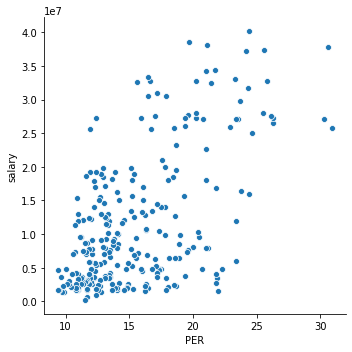

In [82]:
sns.relplot(data=df_salaries,x='PER',y='salary')

In [83]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()

In [85]:
X_scaled = df_salaries.drop(columns='Player')
X_scaled = scaler.fit_transform(X_scaled)

In [70]:
#X_scaled = pd.DataFrame(X_scaled)
#X_scaled.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

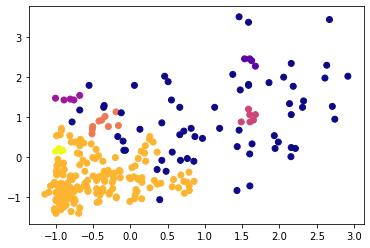

In [74]:
%matplotlib inline
dbscan = DBSCAN(eps=.2,min_samples=4)
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap='plasma')


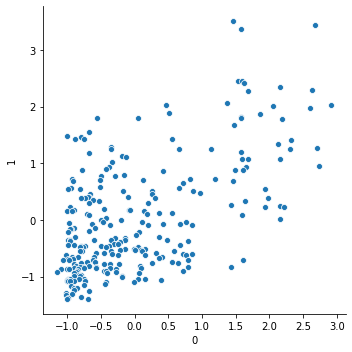

In [63]:
sns.relplot(data=X_scaled,x=0,y=1)

In [87]:
X_scaled = pd.DataFrame(X_scaled)
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)
kmeans.predict(X_scaled)
df_salaries['cluster'] = kmeans.predict(X_scaled)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [ ]:
sns.relplot(data=,x='TRB',y='AST',hue='cluster')